비지도 학습 : 머신러닝의 미래 언제 어디서나 사용할 수있음
 - 입력데이터(x)만 존재, 출력(y) 없음

In [1]:
#p 221 10개의 숫자 이미지 OCR
# 비지도학습으로 숫자인식을 랄 수 있습니다. 

In [25]:
#221
from sklearn.datasets import load_digits #digits 숫자

In [3]:
digits = load_digits()

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.target.shape # Y 예측 목표(타겟)

(1797,)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.images.shape

(1797, 8, 8)

In [24]:
import matplotlib.pylab as plt

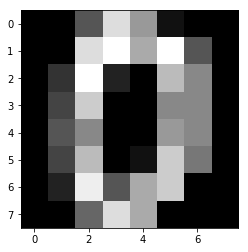

In [11]:
plt.imshow(digits.images[0], cmap='gray')

In [12]:
#221 64개의 명암 값을 2개로 차원축소를 해서 2차원 그래프에 산점도로 그려봅니다. 

In [20]:
from sklearn.decomposition import PCA
import mglearn

In [14]:
pca = PCA(n_components=2).fit(digits.data) #64차원을 2차원으로 축소

In [18]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

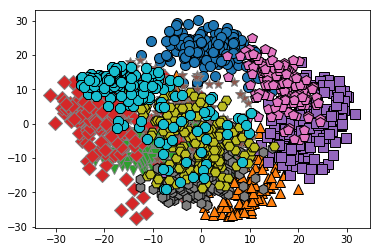

In [21]:
mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1], digits.target)

In [22]:
#223
from sklearn.manifold import TSNE

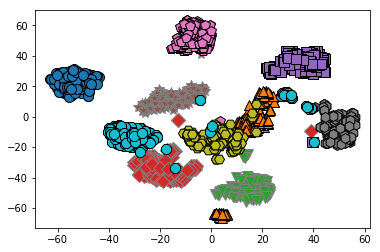

In [25]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], digits.target)

225 군집(clustering) - 분류, 이상치 검출(abnormal Detection)
- k 평균 군집
- 변합 군집
- DBSCAN( Density based spatial clustering Application Noise) 밀도가 높은 공간


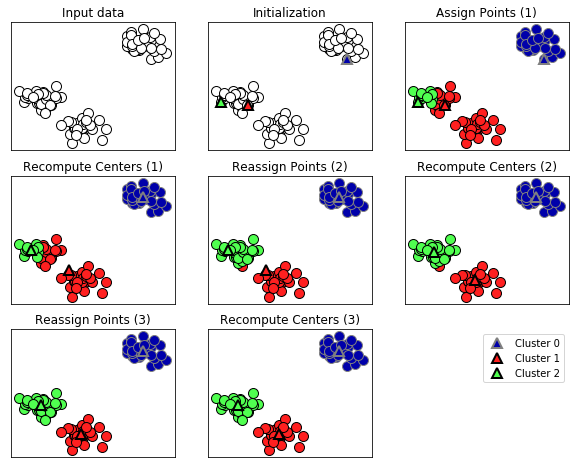

In [28]:
mglearn.plots.plot_kmeans_algorithm()

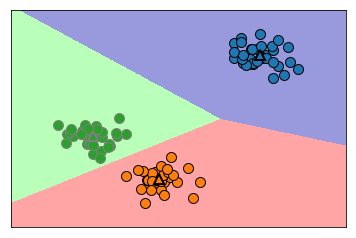

In [29]:
mglearn.plots.plot_kmeans_boundaries()

In [36]:
from sklearn.datasets import make_blobs
x,y = make_blobs() #연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

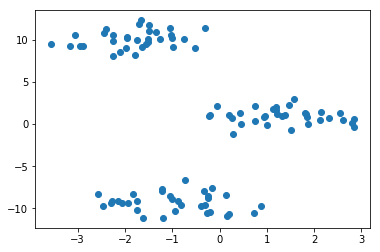

In [37]:
plt.scatter(x[:,0],x[:,1])

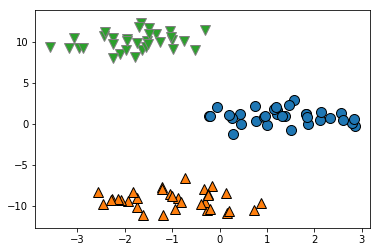

In [38]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], y)

In [15]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters=3).fit(x) #x를 3개로 그룹화(cluster)

In [52]:
km.predict(x) # x 가 몇번째 그룹이니? 

array([1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1])

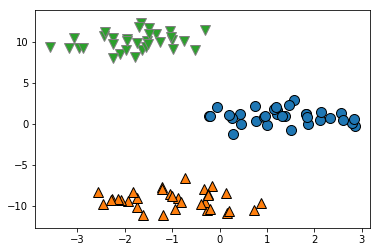

In [53]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], km.predict(x))

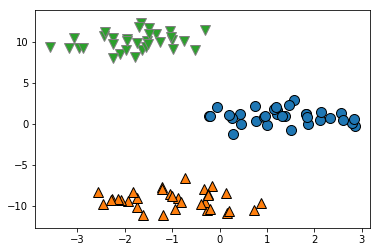

In [47]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], y)

digits에 적용해보세요
- t-sne 로 2개의 차원으로 축소합니다.
- 그 데이터로 k-means 를 fit 합니다.k = 10
- k-means의 예측을 산점도에서 표시합니다. 

In [56]:
pca_x.shape

(1797, 2)

In [57]:
km_digits = KMeans(n_clusters=10).fit(pca_x) 

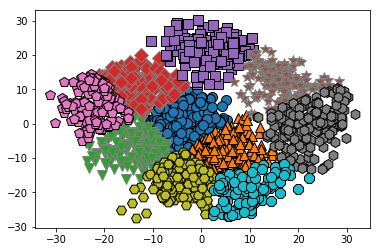

In [60]:
l_digits = mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1], km_digits.predict(pca_x))

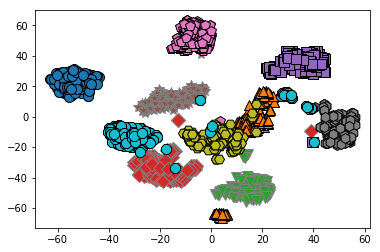

In [61]:
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], digits.target)

In [62]:
km_digits_tsne = KMeans(n_clusters=10).fit(digits_tsne) 

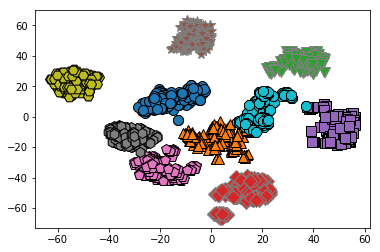

In [63]:
l_tsne = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], km_digits_tsne.predict(digits_tsne))

머신러닝저장소 -3위 와인 데이터


- 와인의 질, 컬러, 알콜 도수 등을 측정 -> 원산지 (3군데)를 추정하는 문제

In [2]:
import pandas as pd

In [47]:
wine = pd.read_csv('wine.csv')
wine_index = ['kindness','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
wine.columns = wine_index
wine = wine.drop(columns='kindness')
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [48]:
pca = PCA(n_components=3).fit(wine)
data_pca = pca.transform(wine)
data_pca.shape


(177, 3)

In [49]:
km = KMeans(n_clusters=3).fit(data_pca) 
group = km.predict(data_pca)

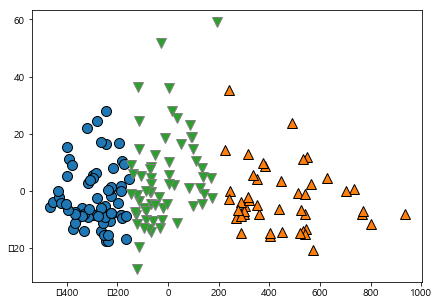

In [50]:
plt.figure(figsize=(7,5))
l = mglearn.discrete_scatter(data_pca[:,0],data_pca[:,1], group)

In [46]:
kindness = wine.iloc[:,0]

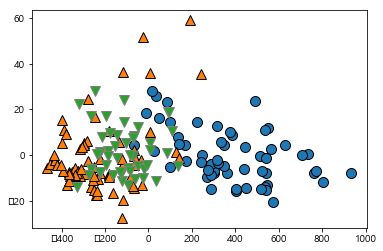

In [51]:
l = mglearn.discrete_scatter(data_pca[:,0],data_pca[:,1], kindness)

한국 프로야구 10개팀 클러스터링
 - url : http://www.kbreport.com/main

In [3]:
url ='kbreport.html'
tables = pd.read_html(url)
len(tables)

7

In [4]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [9]:
baseball = tables[0]
base=baseball.set_index('팀명')
base

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [10]:
data = base.drop(columns='연속')

In [12]:
data.shape

(10, 8)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape


(10, 2)

In [18]:
km = KMeans(n_clusters=3).fit(data_pca) 
group = km.predict(data_pca)

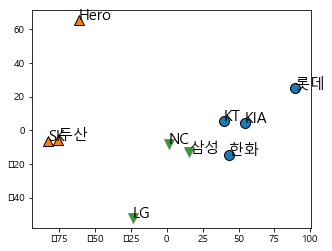

In [26]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,4))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})


l = mglearn.discrete_scatter(data_pca[:,0],data_pca[:,1], group)

loans

### 대출 상환여부
1. get_dummy()로 purpose 원핫 인코딩
1. PCA로 2차원으로 축소
1. K-Means(2개) 로 그룹화
1. 산점도로 출력

In [59]:
loans = pd.read_csv('loans.csv')
loans = loans.dropna(0)
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [60]:
loan_hot = pd.get_dummies(loans)

In [61]:
loan_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9577
Data columns (total 20 columns):
credit.policy                 9516 non-null int64
int.rate                      9516 non-null float64
installment                   9516 non-null float64
log.annual.inc                9516 non-null float64
dti                           9516 non-null float64
fico                          9516 non-null int64
days.with.cr.line             9516 non-null float64
revol.bal                     9516 non-null int64
revol.util                    9516 non-null float64
inq.last.6mths                9516 non-null float64
delinq.2yrs                   9516 non-null float64
pub.rec                       9516 non-null float64
not.fully.paid                9516 non-null int64
purpose_all_other             9516 non-null uint8
purpose_credit_card           9516 non-null uint8
purpose_debt_consolidation    9516 non-null uint8
purpose_educational           9516 non-null uint8
purpose_home_improvement 

In [67]:
pca = PCA(n_components=2).fit(loan_hot)
loan_pca = pca.transform(loan_hot)
loan_pca.shape


(9516, 2)

In [68]:
km = KMeans(n_clusters=2).fit(loan_pca) 
group = km.predict(loan_pca)

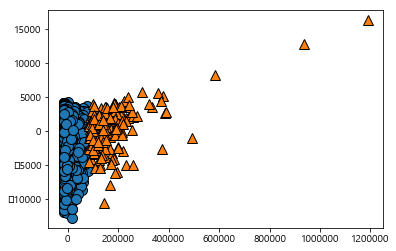

In [69]:
l = mglearn.discrete_scatter(loan_pca[:,0],loan_pca[:,1], group) #예측

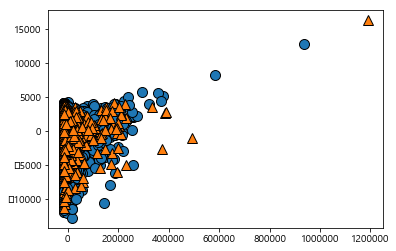

In [70]:
l = mglearn.discrete_scatter(loan_pca[:,0],loan_pca[:,1], loans.iloc[:,-1]) #실제로 돈 안갚는 사람